In [17]:
# Importing required libraries.

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# System
import os
import warnings

# Disabling alerts
warnings.filterwarnings('ignore')

In [18]:
dataset_raw=pd.read_csv("/content/VerBilimi101Proje.csv")
dataset_raw.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,0,125,125,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,1,57,468,8.2105,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,2,33,230,6.9696,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,3,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,4,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [19]:
# Remove column 0 from the dataset
dataset_raw.drop('Unnamed: 0',inplace=True, axis=1)
# Columns titled 0, 1, 2, 3 and 1558 are changed to height, width, ratio, local and target respectively
dataset_raw.rename(columns={'0':'height', '1':'width', '2':'ratio(width/height)','3':'local', '1558':'target'}, inplace=True)

dataset_raw.head(5)

,height,width,ratio(width/height),local,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,target
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [20]:
# '?' values containing are filled with 'nan'
dataset=dataset_raw.applymap(lambda x:np.nan if isinstance(x,str) and '?' in x else x)

# Features with missing information is searching.
results=dataset.iloc[:,:].isnull().sum()

In [21]:
null_columns=[]
for index, value in results.iteritems():
    if value !=0:
        print("{} : {}".format(index, value))
        null_columns.append(index)

height : 903
width : 901
ratio(width/height) : 910
local : 15


In [22]:
# The results obtained in the cell above are obtained more simply.
print(results[results>0])

height                 903
width                  901
ratio(width/height)    910
local                   15
dtype: int64


In [23]:
# Since the height, width and ratio(width/height) properties contain floating point values, they will be filled with the average of the corresponding column.
# Since the local property contains a categorical value, it will be filled with the most frequent value.

In [24]:
dataset[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   height               2376 non-null   object
 1   width                2378 non-null   object
 2   ratio(width/height)  2369 non-null   object
 3   local                3264 non-null   object
dtypes: object(4)
memory usage: 102.6+ KB


In [25]:
# The variable types of the height, width, ratio(width/height) and local properties are converted to numeric values.
label_encoder=LabelEncoder()
dataset['target']=label_encoder.fit_transform(dataset['target'])
dataset[null_columns]=dataset[null_columns].astype('float')
dataset[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               2376 non-null   float64
 1   width                2378 non-null   float64
 2   ratio(width/height)  2369 non-null   float64
 3   local                3264 non-null   float64
dtypes: float64(4)
memory usage: 102.6 KB


In [26]:
print("0-->{} ve 1-->{}".format(label_encoder.inverse_transform([0])[0],
                                label_encoder.inverse_transform([1])[0]))

0-->ad. ve 1-->nonad.


In [27]:
#Tüm eksik satırları göstermek yerine, birkaç eksik satırı görüntüleyelim
#10, 24 ve 72 satırları eksik bilgiler içermektedir.
#Bu satırları görelim.
dataset.iloc[[10,24,72]]

,height,width,ratio(width/height),local,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,target
10,NaN,NaN,NaN,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,NaN,NaN,NaN,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,NaN,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# height, width ve ratio sütünlarında yer alan eksik bilgiler sütünun ortalaması ile doldurulur
dataset.iloc[:,0:3]=dataset.iloc[:,0:3].fillna(dataset.iloc[:,0:3].dropna().mean())

# local sütünundaki eksik bilgiler en cok olan kategori ile doldurulur
dataset['local']=dataset['local'].fillna(dataset['local'].dropna().mode()[0])

In [29]:
#Tüm eksik bilgiler doldurulmuştur
#Eksik bilgiler doldurulduktan sonra 10, 24 ve 72 numaralı satırları görelim
dataset.iloc[[10,24,72]]

,height,width,ratio(width/height),local,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,target
10,63.893626,155.593921,3.911953,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,63.893626,155.593921,3.911953,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,63.893626,155.593921,3.911953,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Veri setindeki 10, 24 ve 72 satırlarnda eksik bilgiler vardı. Bu bilgiler ortalama ile doldurulmuştur. Null değer içeren sütünları kontrol edelim.
dataset[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               3279 non-null   float64
 1   width                3279 non-null   float64
 2   ratio(width/height)  3279 non-null   float64
 3   local                3279 non-null   float64
dtypes: float64(4)
memory usage: 102.6 KB


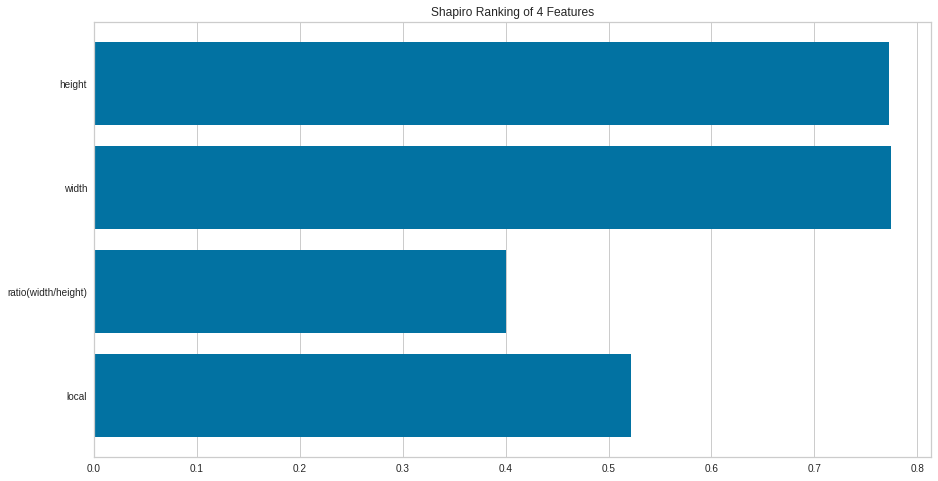

<Figure size 360x576 with 0 Axes>

In [31]:
from yellowbrick.features import Rank1D

checked_X=dataset[null_columns]
checked_y=dataset['target']

fig, ax=plt.subplots(figsize=(15,8))
rank1D=Rank1D(features=null_columns, 
              algorithm="shapiro",
             ax=ax)

rank1D.fit(checked_X, checked_y)
rank1D.transform(checked_X)

plt.figure(figsize=(5,8))
rank1D.poof(title="ben")

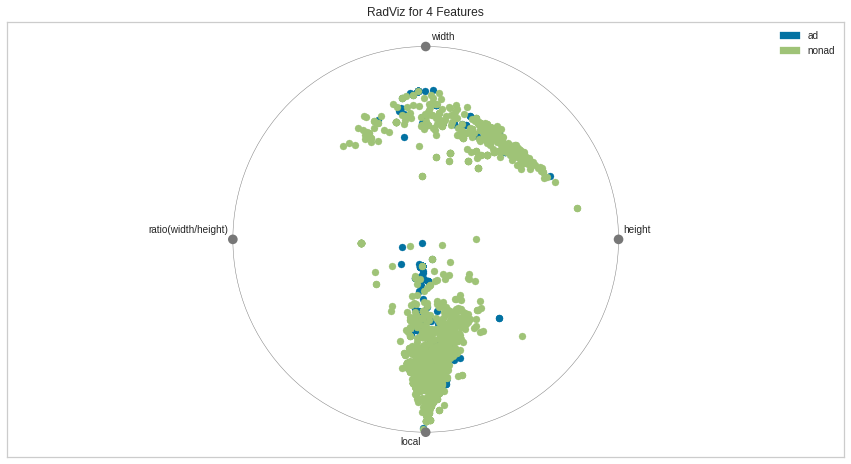

In [32]:
from yellowbrick.features import RadViz

fig, ax=plt.subplots(figsize=(15,8))
radViz=RadViz(classes=['ad', 'nonad'], 
              features=null_columns,
             ax=ax
             )
radViz.fit(checked_X, checked_y)
radViz.transform(checked_X)

radViz.poof()

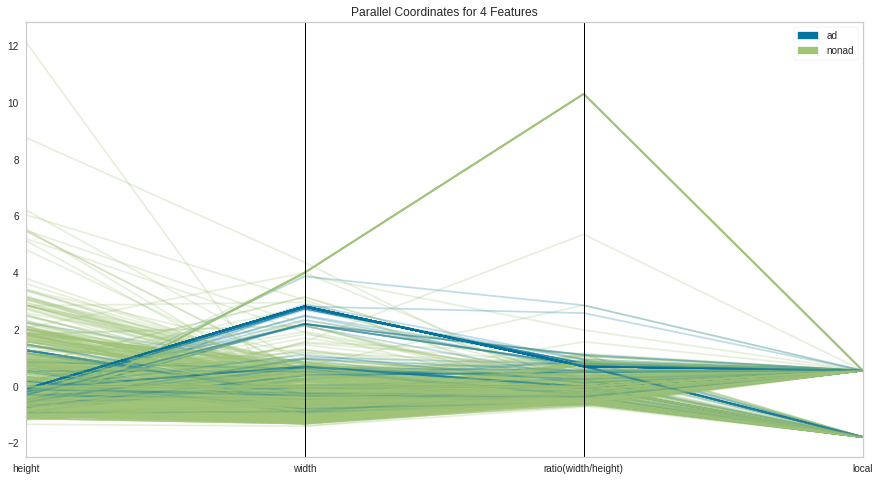

In [33]:
from yellowbrick.features import ParallelCoordinates
fig, ax=plt.subplots(1, figsize=(15,8))
parallelCoordinates=ParallelCoordinates(classes=['ad', 'nonad'],
                                       features=null_columns, 
                                        sample=0.5, 
                                        shuffle=True,
                                        normalize="standard",
                                       ax=ax)

parallelCoordinates.fit(checked_X, checked_y)
parallelCoordinates.transform(checked_X)


parallelCoordinates.poof()

1    2820
0     459
Name: target, dtype: int64


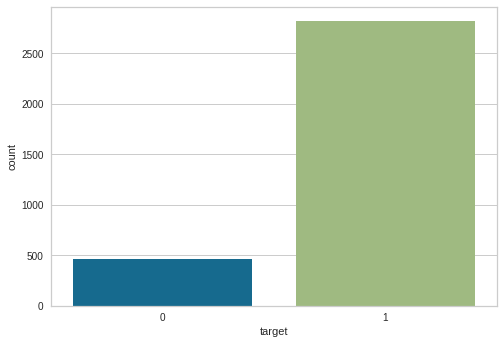

In [34]:
# ad ve nonad sınıflarının dağılımı
print(dataset['target'].value_counts())
sns.countplot(dataset['target'])

In [35]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(16,10))

    counter=0
    for i in range(rows):
        for j in range(cols):
             
            if counter>(number_of_column-1):
                break
            if 'violin' in plot_type:
                sns.violinplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='target',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='target',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1

['height', 'width', 'ratio(width/height)', 'local', 'target']


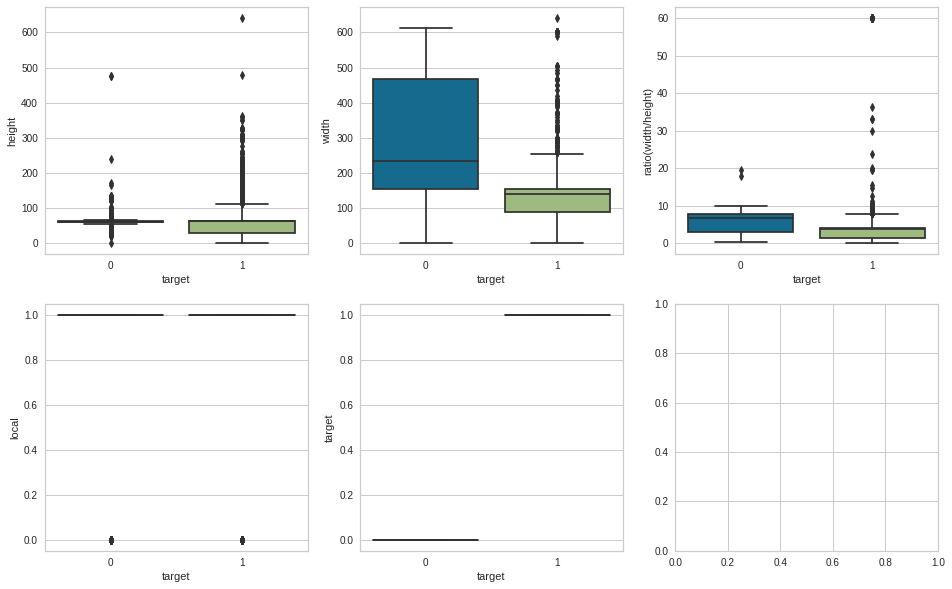

In [36]:
columns_for_visualization=null_columns + ['target']
print(columns_for_visualization)
draw_multivarient_plot(dataset[columns_for_visualization],rows=2,cols=3,plot_type="box")

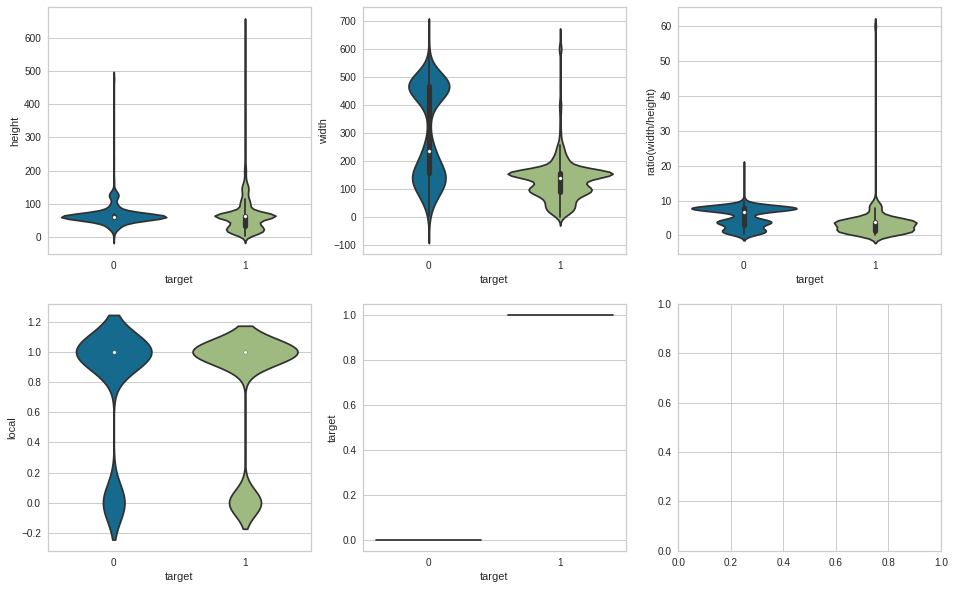

In [37]:
draw_multivarient_plot(dataset[columns_for_visualization],rows=2,cols=3,plot_type="violin")


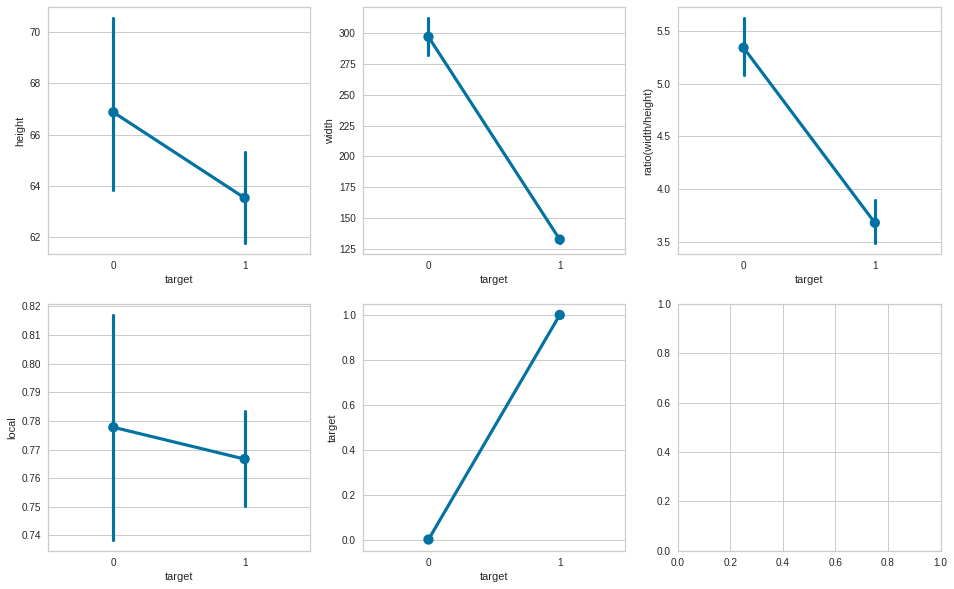

In [38]:
draw_multivarient_plot(dataset[columns_for_visualization],rows=2,cols=3,plot_type="point")

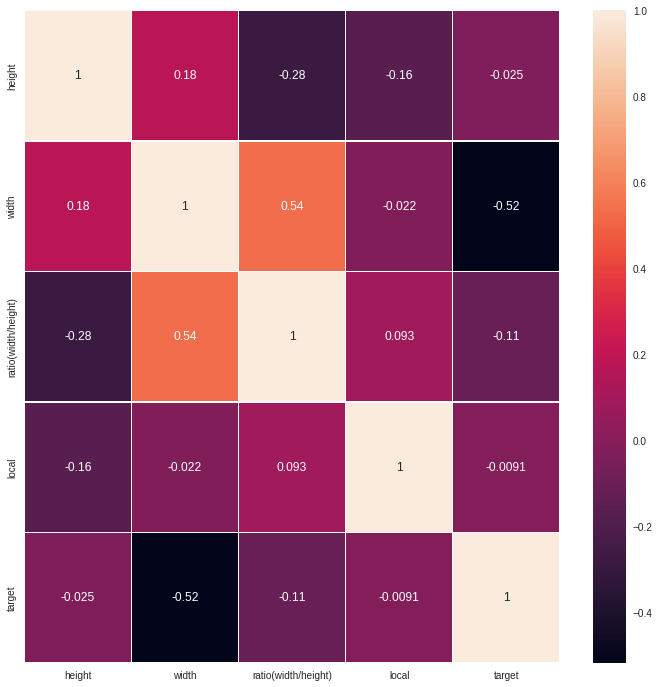

In [39]:
# özelliklerin birbirleriyle olan ilişkisini korelasyon matrisi kullanarak gösterebiliriz. 
corr=dataset[columns_for_visualization].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr,annot=True,linewidths=.5, ax=ax)

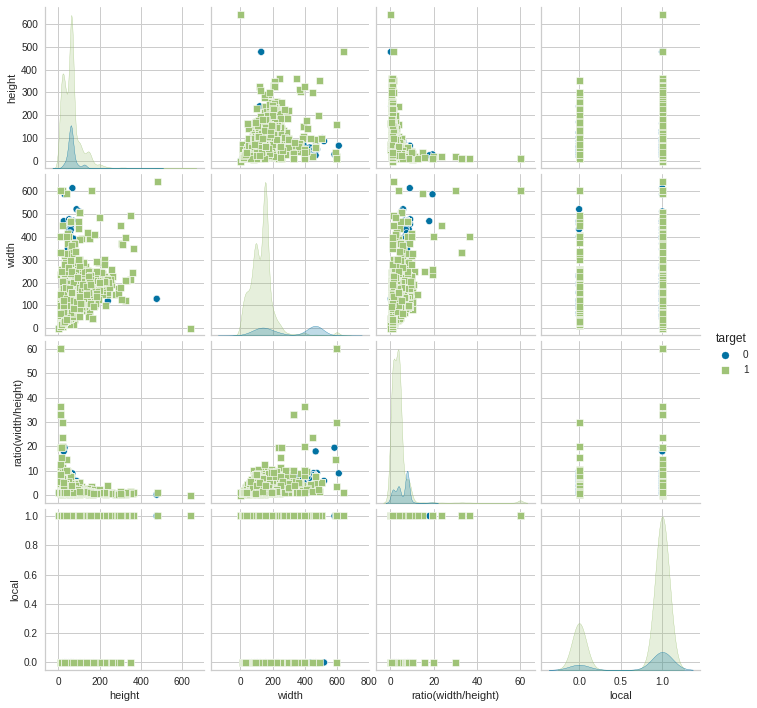

In [40]:
# özelliklerin birbirleriyle olan ilişkisini pairplot kullanarak gösterebiliriz. 
sns.pairplot(dataset[columns_for_visualization], hue="target", markers=["o", "s"])

In [41]:
def get_models():
    models=[]
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier(n_neighbors = 3)))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC(probability=True)))
    models.append(("SVM linear",SVC(kernel='linear')))
    
    return models

In [42]:
def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
    print("Çapraz Doğrulama Başarı Oranları".upper())
    models=get_models()
    results=[]
    names= []

    for name, model in models:
        kfold=KFold(n_splits=5,shuffle=True, random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold)
        names.append(name)
        results.append(cv_result)
        print("{} modelinin çapraz doğrulaması yapıldı, başarı oranı:{:0.2f}".format(name, cv_result.mean()))
        print(cv_result)

def cross_validate(dataset, target_name):
    X=dataset.drop(target_name, axis=1)
    y=dataset[target_name]

    X=StandardScaler().fit_transform(X)
    
    #labelEncoder=LabelEncoder()
    #y=labelEncoder.fit_transform(y)

    cross_validation_scores_for_various_ml_models(X, y)

In [ ]:
cross_validate(dataset=dataset, target_name="target")

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.96
[0.9695122  0.96036585 0.96036585 0.96341463 0.96641221]
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.97
[0.9695122  0.97408537 0.9679878  0.96646341 0.96946565]
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.78
[0.77743902 0.77439024 0.7972561  0.75304878 0.78167939]
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.96
[0.97256098 0.9527439  0.94969512 0.96036585 0.96030534]
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.97
[0.97408537 0.9679878  0.96341463 0.9695122  0.96030534]


In [ ]:
from sklearn.metrics import accuracy_score
def SVM_GridSearch(dataset, target_name):
    X=dataset.drop(target_name, axis=1)
    X=StandardScaler().fit_transform(X)
    
    y=dataset[target_name]
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    kernels=['rbf', 'linear']
    
    for gamma in gammas:
        for C in Cs:
            for kernel in kernels:
                svm=SVC(kernel=kernel,gamma=gamma, C=C)
                svm.fit(X_train, y_train)


                score=svm.score(X_test, y_test)

                if score>best_score:
                    y_pred=svm.predict(X_test)
                    best_score=score
                    best_params={'kernel':kernel, 'C':C, 'gamma':gamma}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("Accuracy: ",end="")
    print(accuracy_score(y_test, y_pred))
    print("classification reports:\n",classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
def classification_report_writer(dataset, target_name):
    models=get_models()
    names= []
    X=dataset.drop(target_name, axis=1)
    X=StandardScaler().fit_transform(X)
    
    y=dataset[target_name]
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
    for name, model in models:
      print(name)
      m = model
      m.fit(X_train, y_train)
      y_pred=m.predict(X_test)
      print("Accuracy: ",end="")
      print(accuracy_score(y_test, y_pred))
      print("classification reports:\n",classification_report(y_test, y_pred))
classification_report_writer(dataset=dataset, target_name='target')

In [ ]:
# bu işlem 10 dakkika kadar sürmektedir
SVM_GridSearch(dataset=dataset, target_name='target')
# Elde edilen en iyi parametreler;
# best params: {'kernel': 'linear', 'C': 0.01, 'gamma': 0.001}

In [ ]:
def SVC_use_best_params(X, y):
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

    svm=SVC(kernel='linear',gamma= 0.001, C=0.01)
    svm.fit(X_train, y_train)
    
    score=svm.score(X_test, y_test)
    y_pred=svm.predict(X_test)
    
    print("Başarı oranı:{:.2f}".format(score))
    print("classification reports:\n",classification_report(y_test, y_pred))

In [ ]:
X=dataset.drop('target', axis=1)
X=StandardScaler().fit_transform(X)
    
y=dataset['target']

SVC_use_best_params(X, y)

In [ ]:
from yellowbrick.classifier import ROCAUC

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)